# Lab 9 - Data vis

In [72]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import random as rnd
from scipy import stats as stats
from scipy import special as spec
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

### Problem 1

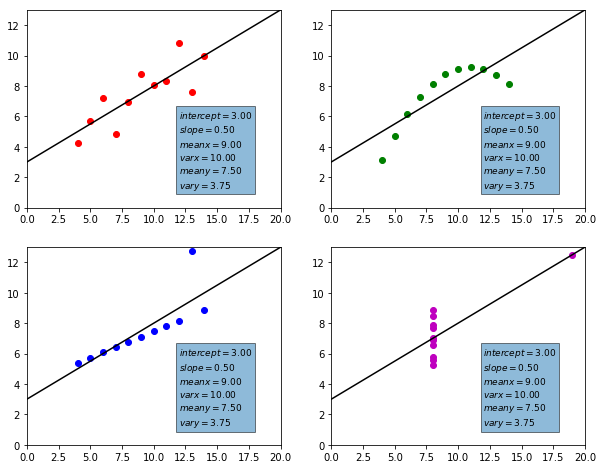

In [58]:
anscombe = np.load('anscombe.npy') #load the data

plt.figure(figsize=(10, 8))

ax1 = plt.subplot(221)
ax1.plot(anscombe[:, 0], anscombe[:, 1], 'ro')
ax1.set_xlim(0, 20)
ax1.set_ylim(0, 13)

ax2 = plt.subplot(222)
ax2.plot(anscombe[:, 2], anscombe[:, 3], 'go')
ax2.set_xlim(0, 20)
ax2.set_ylim(0, 13)

ax3 = plt.subplot(223)
ax3.plot(anscombe[:, 4], anscombe[:, 5], 'bo')
ax3.set_xlim(0, 20)
ax3.set_ylim(0, 13)

ax4 = plt.subplot(224)
ax4.plot(anscombe[:, 6], anscombe[:, 7], 'mo')
ax4.set_xlim(0, 20)
ax4.set_ylim(0, 13)

plt.axis([0, 20, 0, 13]) #set limits of all scatters

#Regression

slope=np.empty(4)
inter=np.empty(4)
r=np.empty(4)
p=np.empty(4)
e=np.empty(4)
for i in range (1, 5, 1):
    slope[i-1], inter[i-1], r[i-1], p[i-1], e[i-1] = stats.linregress(anscombe[:, 2*i-2], anscombe[:, 2*i-1])

x = np.linspace(0, 20, 10)

ax1.plot(x, inter[0] + slope[0]*x, 'k-')
ax2.plot(x, inter[1] + slope[1]*x, 'k-')
ax3.plot(x, inter[2] + slope[2]*x, 'k-')
ax4.plot(x, inter[3] + slope[3]*x, 'k-')

#Adding text information

props = dict(boxstyle='square', alpha=0.5)


textstr1 = '$intercept=%.2f$\n$slope=%.2f$\n$meanx=%.2f$\n$varx=%.2f$\n$meany=%.2f$\n$vary=%.2f$'%(inter[0],
                                                                        slope[0],
                                                                        np.mean(anscombe[:, 0]),
                                                                        np.var(anscombe[:, 0]),
                                                                        np.mean(anscombe[:, 1]),
                                                                        np.var(anscombe[:, 1]))

textstr2 = '$intercept=%.2f$\n$slope=%.2f$\n$meanx=%.2f$\n$varx=%.2f$\n$meany=%.2f$\n$vary=%.2f$'%(inter[1],
                                                                        slope[1],
                                                                        np.mean(anscombe[:, 2]),
                                                                        np.var(anscombe[:, 2]),
                                                                        np.mean(anscombe[:, 3]),
                                                                        np.var(anscombe[:, 3]))

textstr3 = '$intercept=%.2f$\n$slope=%.2f$\n$meanx=%.2f$\n$varx=%.2f$\n$meany=%.2f$\n$vary=%.2f$'%(inter[2],
                                                                        slope[2],
                                                                        np.mean(anscombe[:, 4]),
                                                                        np.var(anscombe[:, 4]),
                                                                        np.mean(anscombe[:, 5]),
                                                                        np.var(anscombe[:, 5]))

textstr4 = '$intercept=%.2f$\n$slope=%.2f$\n$meanx=%.2f$\n$varx=%.2f$\n$meany=%.2f$\n$vary=%.2f$'%(inter[3],
                                                                        slope[3],
                                                                        np.mean(anscombe[:, 6]),
                                                                        np.var(anscombe[:, 6]),
                                                                        np.mean(anscombe[:, 7]),
                                                                        np.var(anscombe[:, 7]))

ax1.text(0.6, 0.5, textstr1, transform=ax1.transAxes, fontsize=9, verticalalignment='top', bbox=props)
ax2.text(0.6, 0.5, textstr2, transform=ax2.transAxes, fontsize=9, verticalalignment='top', bbox=props)
ax3.text(0.6, 0.5, textstr3, transform=ax3.transAxes, fontsize=9, verticalalignment='top', bbox=props)
ax4.text(0.6, 0.5, textstr4, transform=ax4.transAxes, fontsize=9, verticalalignment='top', bbox=props)
plt.show()


### Problem 2

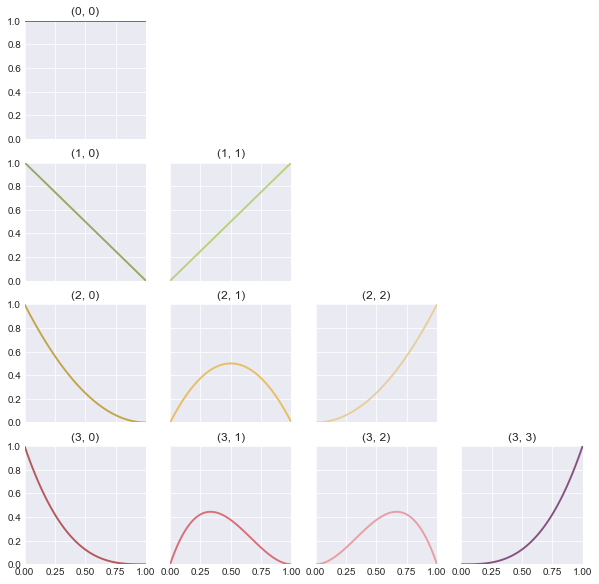

In [78]:
x = np.linspace(0, 1, 100)

plt.figure(figsize=(10, 10))

plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('tab20b')

for n in range(0, 4):
    for v in range(0, n+1):
        place = (n+1)*4 - 3 + v
        plt.subplot(4, 4, place) #find right spot in the plot
        b = spec.binom(n, v) * (x**v) * (1-x)**(n-v)
        plt.plot(x, b, marker='', color=palette(place), linewidth=1.9, alpha=0.9, label=(n, v))
        plt.title((n,v))
        plt.xlim(0,1)
        plt.ylim(0,1)
        
        if place in range(13):
            plt.tick_params(labelbottom='off')
        
        if place in [2, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16]:
            plt.tick_params(labelleft='off')

plt.show()
 

### Problem 3

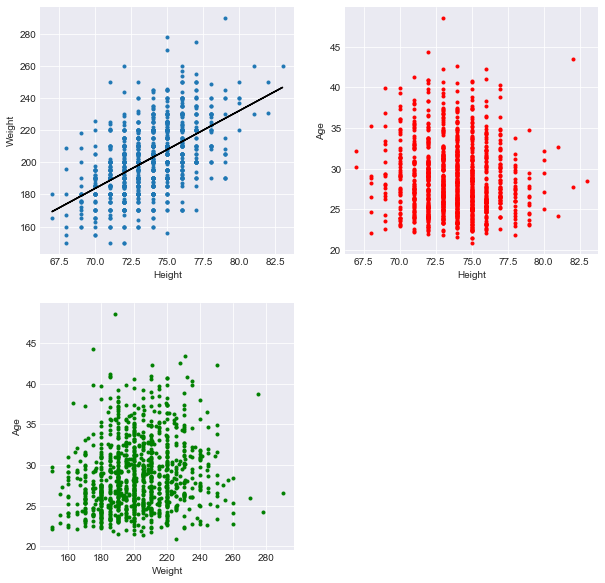

In [92]:
mlb = np.load('MLB.npy') #load the data

height = mlb[:, 0]
weight = mlb[:, 1]
age = mlb[:, 2]

plt.figure(figsize=(10, 10))

plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('tab20b')

#Height v weight
plt.subplot(2, 2, 1)
plt.plot(height, weight, 'o', markersize=3.0)
plt.xlabel('Height')
plt.ylabel('Weight')
slope, intercept, r_value, p_value, std_err = stats.linregress(height, weight)
plt.plot(height, slope*height+intercept, 'k-' )

#Height vs age
plt.subplot(2, 2, 2)
plt.plot(height, age, 'ro', markersize=3.0)
plt.xlabel('Height')
plt.ylabel('Age')

#Weight vs age
plt.subplot(2, 2, 3)
plt.plot(weight, age, 'go', markersize=3.0)
plt.xlabel('Weight')
plt.ylabel('Age')

plt.show()

### Problem 4

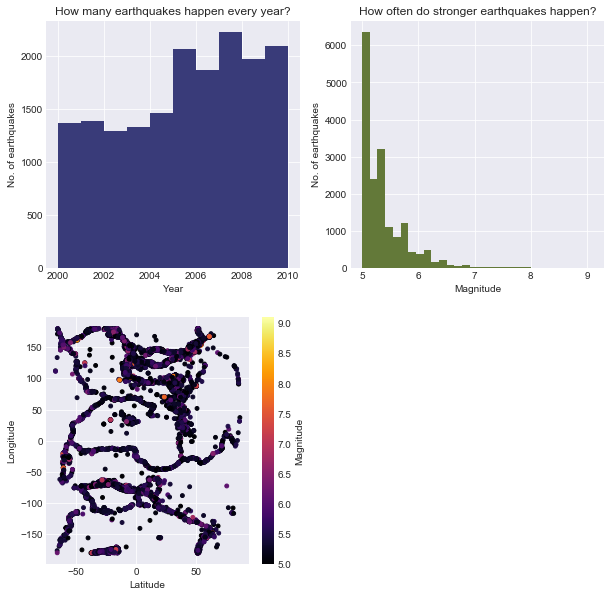

In [165]:
year, magnitude, longitude, latitude = np.load('earthquakes.npy').T #load the data

plt.figure(figsize=(10, 10))

plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('tab20b')

#How many earthquakes happened every year

plt.subplot(2,2,1)
plt.hist(year, bins=10, range=[2000, 2010], color=palette(0))
plt.xlabel('Year')
plt.ylabel('No. of earthquakes')
plt.title('How many earthquakes happen every year?')

#How often do stronger earthquakes happen?

plt.subplot(2, 2, 2)
plt.hist(magnitude, bins=30, color=palette(4))
plt.xlabel('Magnitude')
plt.ylabel('No. of earthquakes')
plt.title('How often do stronger earthquakes happen?')

#Where do the strongest earthquakes happen

plt.subplot(2, 2, 3)
plt.scatter(latitude, longitude, 15, c = magnitude, cmap='inferno')
cbar= plt.colorbar()
plt.xlabel('Latitude')
plt.ylabel('Longitude')
cbar.set_label('Magnitude')
plt.show()

### Problem 5

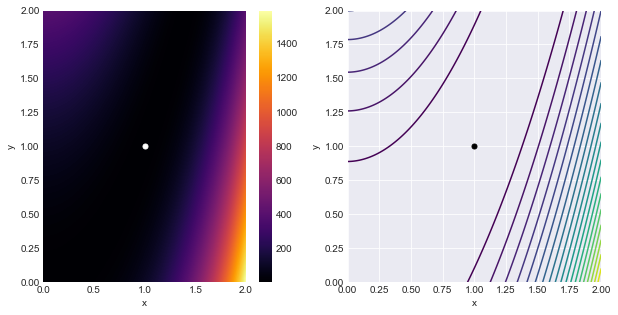

In [177]:
plt.figure(figsize=(10, 5))

plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('tab20b')

x = np.linspace(0, 2, 1000)
y = np.linspace(0, 2, 1000)

X, Y = np.meshgrid(x, y) #extract values of domain
Z = (1-X)**2 + 100*(Y-X**2)**2 #compute output of function
     
plt.subplot(1, 2, 1)
plt.pcolormesh(X, Y, Z, cmap='inferno')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(1, 1, 'wo', markersize=5)

plt.subplot(1, 2, 2)
plt.contour(X, Y, Z, 20, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(1, 1, 'ko', markersize=5)

plt.show()

### Problem 6

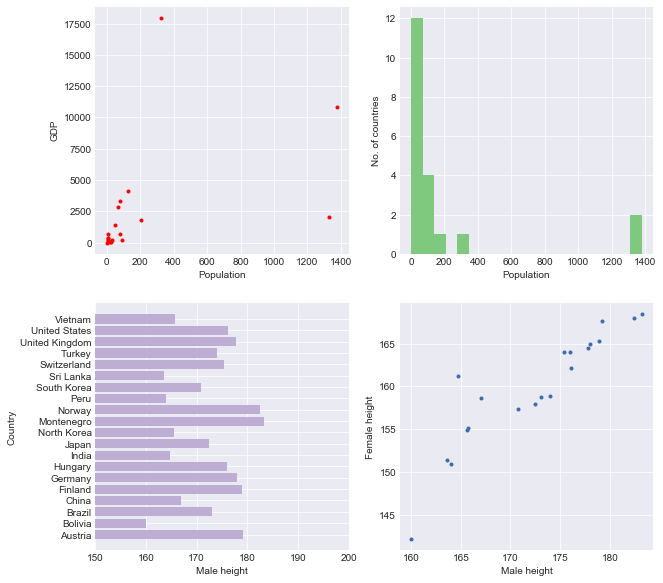

In [191]:
country_data = np.load('countries.npy')

pop, gdp, mheight, fheight = country_data.T

countries = ["Austria", "Bolivia", "Brazil", "China",
"Finland", "Germany", "Hungary", "India",
"Japan", "North Korea", "Montenegro", "Norway",
"Peru", "South Korea", "Sri Lanka", "Switzerland",
"Turkey", "United Kingdom", "United States", "Vietnam"]

palette = plt.get_cmap('Accent')

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(pop, gdp, 'ro', markersize=3.0)
plt.xlabel('Population')
plt.ylabel('GDP')

plt.subplot(2, 2, 2)
plt.hist(pop, bins=20, color = palette(0))
plt.xlabel('Population')
plt.ylabel('No. of countries')

positions = np.arange(len(countries))
plt.subplot(2, 2, 3)
plt.barh(positions, mheight, align='center', color=palette(1))
plt.yticks(positions, countries)
plt.ylabel('Country')
plt.xlabel('Male height')
plt.xlim(150, 200)

plt.subplot(2, 2, 4)
plt.plot(mheight, fheight, 'o', color=palette(4), markersize=3.0)
plt.xlabel('Male height')
plt.ylabel('Female height')

plt.show()